# Clean and Analyze Employee Exit Surveys


This project will focus on two datasets:
1. Exit surveys from employees of the Department of Education, Training and Employment (DETE)
2. The Technical and Further Education (TAFE) institute.
Both surveys were conducted in Queensland, Australia.
Our stakeholders wish to know the possible reasons for dissatisfaction amongst employees, based on both combined datasets.
Both dataset were collected separtely, however they are based on the same survey template.
Our aim is to figure out what affects resigning and explore employee dissatisfaction.
    

In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 40)


In [4]:
#read in the data
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')
#pd.options.display.max_columns = 100

In [ ]:
### Explore dete survey dataset

In [5]:
#dete_survey.info()
dete_survey.head(12)
#dete_survey.isnull().sum()
#dete_survey['SeparationType'].value_counts()
#dete_survey['Role Start Date'].value_counts()
#dete_survey['Job dissatisfaction'].value_counts()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994,1997,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,D,D,NaN,Female,41-45,NaN,NaN,NaN,NaN,NaN
6,7,Age Retirement,05/2012,1972,2007,Teacher,Secondary,Darling Downs South West,NaN,Permanent Part-time,...,D,D,SD,Female,56-60,NaN,NaN,NaN,NaN,NaN
7,8,Age Retirement,05/2012,1988,1990,Teacher Aide,NaN,North Coast,NaN,Permanent Part-time,...,SA,NaN,SA,Female,61 or older,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009,2009,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,A,D,N,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997,2008,Teacher Aide,NaN,Not Stated,NaN,Permanent Part-time,...,SD,SD,SD,Female,46-50,NaN,NaN,NaN,NaN,NaN


The dete_survey dataset contains 822 entries and 56 columns. The "Separetion type" column contains 9 options, and seems to be a multi-choise question. The dates were typed with different formats. Missing values were observed, in some coloumn there is a significant amount of missing values (more than 90%), which implies on questions that were too private, or were not collected together with the other questions. A 'Not Stated' value appears, which implies on missing values that are not represented as 'NaN'.

### Explore tafe survey dataset

In [6]:
#tafe_survey.info()
#tafe_survey.head(12)
#tafe_survey.tail(10)
tafe_survey.isnull().sum()
#tafe_survey['Reason for ceasing employment'].value_counts()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

The tafe_survey dataset contains 702 entries and 72 columns. The "Reason for ceasing employment" column contains 6 options, some similar to those in the 'dete_survey' data set. Missing values were observed.

Since both surveys were based on the same template, they share similar columns. However, each contains many columns that are not needed for our analysis. The remaining column names should be changed.

Some columns and values can provide insights on employees safisfaction, and should be further analyzed.

## Handling missing values and droping columns


In [7]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')
#drop irelevant columns for the analysis
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

In [8]:
#drop irelevant columns for the analysis
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
Record ID                                                                    702 non-null float64
Institute                                                                    702 non-null object
WorkArea                                                                     702 non-null object
CESSATION YEAR                                                               695 non-null float64
Reason for ceasing employment                                                701 non-null object
Contributing Factors. Career Move - Public Sector                            437 non-null object
Contributing Factors. Career Move - Private Sector                           437 non-null object
Contributing Factors. Career Move - Self-employment                          437 non-null object
Contributing Factors. Ill Health                                             437 non-null object
Contributing Factors

## Rename column names

Since our datasets will be combined, the column names should be cleand and renamed.

In [9]:
# explore current columns names
print('dete survey column names:' , dete_survey_updated.columns)
print('\n')
print('tafe survey column names:' , tafe_survey_updated.columns)

dete survey column names: Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')


tafe survey column names: Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Car

In [10]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')
dete_survey_updated.info()
print(dete_survey_updated.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
id                                     822 non-null int64
separationtype                         822 non-null object
cease_date                             788 non-null object
dete_start_date                        749 non-null float64
role_start_date                        724 non-null float64
position                               817 non-null object
classification                         455 non-null object
region                                 717 non-null object
business_unit                          126 non-null object
employment_status                      817 non-null object
career_move_to_public_sector           822 non-null bool
career_move_to_private_sector          822 non-null bool
interpersonal_conflicts                822 non-null bool
job_dissatisfaction                    822 non-null bool
dissatisfaction_with_the_department    822 non-null bool
physical_work_envir

In [11]:
new_tafe_column_names = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age',
       'Employment Type. Employment Type': 'employment_status',
       'Classification. Classification': 'position',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated = tafe_survey_updated.rename(new_tafe_column_names, axis = 1)
tafe_survey_updated.info()

#check all column names were updated
print(tafe_survey_updated.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
id                                                     702 non-null float64
Institute                                              702 non-null object
WorkArea                                               702 non-null object
cease_date                                             695 non-null float64
separationtype                                         701 non-null object
Contributing Factors. Career Move - Public Sector      437 non-null object
Contributing Factors. Career Move - Private Sector     437 non-null object
Contributing Factors. Career Move - Self-employment    437 non-null object
Contributing Factors. Ill Health                       437 non-null object
Contributing Factors. Maternity/Family                 437 non-null object
Contributing Factors. Dissatisfaction                  437 non-null object
Contributing Factors. Job Dissatisfaction              437 non-null 

## Filtering rows with resiged employess

In this projects, we are aiming to identify if the employment time is related to employess dissatisfaction. Hence, we will only keep the "Resignation" in the "separationtype" column.
In the 'dete' dataframe, there are three types of 'resignation' options. We will combine all as 'Resignation', regardless the spesific reason for the resignation.

In [12]:
#check unique values in 'separation type' column
dete_survey_updated['separationtype'].value_counts()

#combine all separation types containing the word "resignation" to 'Resignation'

dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]

#check updated unique values in 'separation type' column
dete_survey_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [13]:
#creating new dataframe with only the resignation separation types 
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'] == 'Resignation'].copy()
dete_resignations

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN
12,13,Resignation,2012,1998.0,1998.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
14,15,Resignation,2012,2007.0,2010.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN
16,17,Resignation,2012,NaN,NaN,Teacher Aide,NaN,South East,NaN,Permanent Part-time,...,False,False,False,Male,61 or older,NaN,NaN,NaN,NaN,NaN
20,21,Resignation,2012,1982.0,1982.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,NaN
21,22,Resignation,2012,1980.0,2009.0,Cleaner,NaN,Darling Downs South West,NaN,Permanent Part-time,...,False,False,False,Female,51-55,NaN,NaN,NaN,NaN,NaN


In [14]:
#check unique values in 'separation type' column
tafe_survey_updated['separationtype'].value_counts()

#creating new dataframe with only the resignation separation types 
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()
tafe_resignations

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4
8,6.341579e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2009.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,36 40,Temporary Full-time,Tutor,3-4,3-4
9,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,Other,-,Female,21 25,Permanent Full-time,Administration (AO),1-2,1-2
10,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,Female,41 45,Temporary Part-time,Administration (AO),Less than 1 year,Less than 1 year
13,6.341725e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Female,31 35,Temporary Full-time,Administration (AO),11-20,Less than 1 year
14,6.341726e+17,Central Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Female,31 35,Permanent Part-time,Teacher (including LVT),7-10,7-10


We now have dataframes contining only employess that resigned, with a total of 311 rows from the 'dete' dataset, and 340 rows from the 'tafe' dataset.

## Verify the data

Checking for abnormalities in the dates columns

In [30]:
#extract the year from 'cease date' column
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype("float")
#dete_resignations.isnull().sum()
dete_resignations['cease_date'].value_counts(dropna=False).sort_index()





 2006.0      1
 2010.0      2
 2012.0    129
 2013.0    146
 2014.0     22
NaN         11
Name: cease_date, dtype: int64

In [16]:
dete_resignations['dete_start_date'].value_counts(dropna=False).sort_index()


 1963.0     1
 1971.0     1
 1972.0     1
 1973.0     1
 1974.0     2
 1975.0     1
 1976.0     2
 1977.0     1
 1980.0     5
 1982.0     1
 1983.0     2
 1984.0     1
 1985.0     3
 1986.0     3
 1987.0     1
 1988.0     4
 1989.0     4
 1990.0     5
 1991.0     4
 1992.0     6
 1993.0     5
 1994.0     6
 1995.0     4
 1996.0     6
 1997.0     5
 1998.0     6
 1999.0     8
 2000.0     9
 2001.0     3
 2002.0     6
 2003.0     6
 2004.0    14
 2005.0    15
 2006.0    13
 2007.0    21
 2008.0    22
 2009.0    13
 2010.0    17
 2011.0    24
 2012.0    21
 2013.0    10
NaN        28
Name: dete_start_date, dtype: int64

In [31]:
#check for delta 
dete_resignations['delta'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations[['cease_date', 'dete_start_date', 'delta']]
dete_resignations['delta'].value_counts()

5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
10.0     6
22.0     6
14.0     6
17.0     6
12.0     6
16.0     5
18.0     5
23.0     4
11.0     4
24.0     4
39.0     3
19.0     3
21.0     3
32.0     3
28.0     2
26.0     2
25.0     2
30.0     2
36.0     2
29.0     1
33.0     1
42.0     1
27.0     1
41.0     1
35.0     1
38.0     1
34.0     1
49.0     1
31.0     1
Name: delta, dtype: int64

In [18]:
tafe_resignations['cease_date'].value_counts().sort_index()




2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

While the 'dete' dataframe contains both cease date and a start date, the 'tafe' dataframe' contains only the cease date. As seen above, the years in both dataframes don't completely align with each other. The 'tafe' dataframe contains some cease dates in 2009 and 2010, but the 'dete' dataframe contains only two values from 2006 & 2010 (one in each year) and the rest from 2012.
There are no negative values in the new 'delta' column, which implies all start day are indeed before the cease date.
There are no outliners that might imply wrong data.

Boxplot might help in identify outliners.
Since there are 11 NaN values in 'cease_date' column, they should first be removed in order to create the plot.

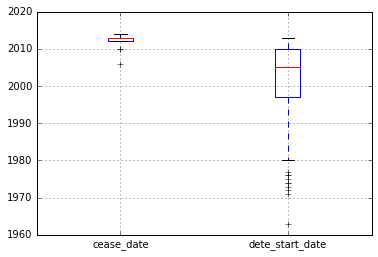

In [32]:
boxplot1 = dete_resignations.boxplot(column=['cease_date', 'dete_start_date'], return_type='axes')
#boxplot2 = tafe_resignations.boxplot(column=['cease_date'], return_type='axes')





## Calculating service time

The tafe dataframe already includes the institute service time column: the duration of time an employee spent at the workplace.
This data is currently missing from the dete dafatrame and should be calculated. However, it was alreasy created before as 'delta' - and shall be renamed.


In [58]:
#Exploe the tafe 'institue_service' column
tafe_resignations['institute_service'].value_counts(dropna=False)

Less than 1 year      73
1-2                   64
3-4                   63
NaN                   50
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

In [59]:
rename_col = {'institue_service' : 'institute_service'}
dete_resignations = dete_resignations.rename(rename_col, axis=1) 
dete_resignations[['dete_start_date','cease_date','institute_service']].head(5)


,dete_start_date,cease_date,institute_service
3,2005.0,2012.0,7.0
5,1994.0,2012.0,18.0
8,2009.0,2012.0,3.0
9,1997.0,2012.0,15.0
11,2009.0,2012.0,3.0


## Identify Dissatisfied Employees


Next, we will identify employees who resigned due to dissatisfaction.
Our aim is to anwer the following question:
Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

First, we will explore the columns that can be helpfull as indication of dissatisfaction, and then create a new column that indicate 'True' for a disstisfied employee, 'False' for any other reason for resignation, and 'NaN' for missing values.

From the dete dataframe, we will take the following columns:
job_dissatisfaction
dissatisfaction_with_the_department
physical_work_environment
lack_of_recognition
lack_of_job_security
work_location
employment_conditions
work_life_balance
workload
interpersonal_conflicts	

From the tafe dataframe, we will take the following columns:
Contributing Factors. Dissatisfaction
Contributing Factors. Job Dissatisfaction


In [92]:
dete_resignations.info()
dete_resignations.head(5)

#update values to either True, False or NaN
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val=='-':
        return False
    else:
        return True

dete_dissatisfaction_cols = ['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload', 'interpersonal_conflicts']
dete_resignations['dissatisfied'] = dete_resignations[dete_dissatisfaction_cols].any(1, skipna=False)
#create a copy of the results
dete_resignations_up = dete_resignations.copy()
#check the new column and updated values
dete_resignations_up['dissatisfied'].value_counts(dropna=False)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 37 columns):
id                                     311 non-null int64
separationtype                         311 non-null object
cease_date                             300 non-null float64
dete_start_date                        283 non-null float64
role_start_date                        271 non-null float64
position                               308 non-null object
classification                         161 non-null object
region                                 265 non-null object
business_unit                          32 non-null object
employment_status                      307 non-null object
career_move_to_public_sector           311 non-null bool
career_move_to_private_sector          311 non-null bool
interpersonal_conflicts                311 non-null bool
job_dissatisfaction                    311 non-null bool
dissatisfaction_with_the_department    311 non-null bool
physical_work_envir

False    157
True     154
Name: dissatisfied, dtype: int64

In [91]:
#tafe_resignations.info()
tafe_resignations.head(3)
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)


#apply to all dissatisfaction columns and create new column
tafe_dissatisfaction_cols = ['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']    
tafe_resignations['dissatisfied'] = tafe_resignations[tafe_dissatisfaction_cols].applymap(update_vals).any(1, skipna=False)

#create a copy of the results
tafe_resignations_up = tafe_resignations.copy()
#check the new column and updated values
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)





False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

## Combining the data

In [96]:
#add a unique column to each dataframe for
#distinguishing between the two dataframes

dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'


In [116]:
#combine the two data sets
combined = pd.concat([dete_resignations_up , tafe_resignations_up],ignore_index = True)

#explore for columns with null values
combined.isnull().sum()
combined.notnull().sum().sort_values()

#drop columns with more then 75% null values
combined_updated = combined.dropna(thresh = 500, axis =1)
#check updated combined dataframe
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 10 columns):
age                  596 non-null object
cease_date           635 non-null float64
dissatisfied         643 non-null object
employment_status    597 non-null object
gender               592 non-null object
id                   651 non-null float64
institute            651 non-null object
institute_service    563 non-null object
position             598 non-null object
separationtype       651 non-null object
dtypes: float64(2), object(8)
memory usage: 50.9+ KB


## Explore and clean the insitute service column

In [136]:
combined_updated['institute_service'].value_counts()

#extract the years of service
pattern = r'(\d+)'
combined_updated['institute_service_clean'] = combined_updated['institute_service'].astype('str').str.extract(pattern)
combined_updated['institute_service_clean'] = combined_updated['institute_service_clean'].astype('float')
combined_updated['institute_service_clean'].value_counts().sort_values()


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:5: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



31.0      1
29.0      1
38.0      1
42.0      1
27.0      1
33.0      1
35.0      1
49.0      1
34.0      1
41.0      1
26.0      2
25.0      2
36.0      2
28.0      2
30.0      2
32.0      3
21.0      3
19.0      3
39.0      3
24.0      4
23.0      4
18.0      5
16.0      5
22.0      6
14.0      6
12.0      6
10.0      6
17.0      6
15.0      7
8.0       8
13.0      8
9.0      14
2.0      14
4.0      16
6.0      17
20.0     17
0.0      20
11.0     30
7.0      34
5.0      56
3.0      83
1.0     159
Name: institute_service_clean, dtype: int64

In [144]:
#split all values in the 'institute_service' into ranges

def service_into_range(val):
    if pd.isnull(val):
        return np.nan
    elif val < 3:
        return 'New'
    elif 3 <= val <=6:
        return 'Experienced'
    elif 7<= val <= 10:
        return 'More Experienced'
    else:
        return 'Most experienced'

combined_updated['institute_service_clean_ranges'] = combined_updated['institute_service_clean'].apply(service_into_range)

#check updated combined dataframe
combined_updated[['institute_service_clean','institute_service_clean_ranges']]
combined_updated['institute_service_clean_ranges'].value_counts()



/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



New                 193
Experienced         172
Most experienced    136
More Experienced     62
Name: institute_service_clean_ranges, dtype: int64

## Analysis on the 'dissatisfied' column

In [195]:
#check for unique values
combined_updated['dissatisfied'].value_counts(dropna=False)


False    406
True     245
Name: dissatisfied, dtype: int64

In [153]:
#fill missing values with 'False' 
combined_updated['dissatisfied'].fillna(value=False, inplace=True)
combined_updated['dissatisfied'].value_counts(dropna=False)


/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



False    406
True     245
Name: dissatisfied, dtype: int64

In [165]:
#The 'dissatisfaction' column in boolean
#since a True value is considered to be 1, calculating the 
#mean will also calculate the percentage of dissatisfied employees
pv_dissatisfied = combined_updated.pivot_table(values='dissatisfied', index='institute_service_clean_ranges')
pv_dissatisfied



,dissatisfied
institute_service_clean_ranges,
Experienced,0.343023
More Experienced,0.516129
Most experienced,0.507353
New,0.300518


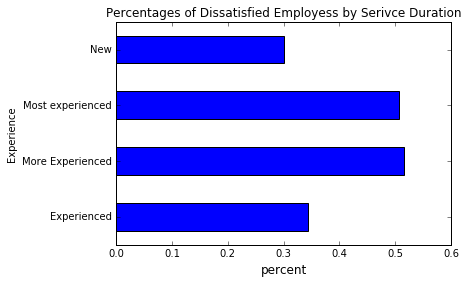

In [194]:
ax = pv_dissatisfied.plot(kind='barh', title ="Percentages of Dissatisfied Employess by Serivce Duration", legend=False)
ax.set_xlabel("percent", fontsize=12)
ax.set_ylabel("Experience")


## Summary

The overall mean dissatisfaction in the combined dataframse is 0.38%.
It seems that the more experience the employee, the dissatisfaction level rises.
